
## Probability and Random Processes
 ### Random Experiment
 A random experiment is a process by which we observe something uncertain. After the experiment the result of the experiment is known.
   #### Trial
   If a random experiment is repeated several times, we call each of them as trial. Thus a trial is a particular performance of a random experiment. In the example of tossing a coin, each trial will result in either heads or tails.
   #### Outcome:
   An outcome is the result of a  random experiment.
   
   #### Sample Space: 
   The set of all possible outcomes of a  random experiment is called sample space.
	
   #### Event
   An event **A** is subset of sample space **S** and we way that **A** __occurred__ if the actual outcome is in  **A**
* example:: Before tossing a coin, you won't know whether you will get heads or tails. This is a random experiment. It's sample space is {__heads, tails__} usually denoted as {__H, T__}.  Another example is if toss a coin 3 times and observe the sequence of heads/tails. The sample space here may be defined as :S = {__(H, H, H), (H, H, T), (H, T, H), (T, H, H), (H, T, T), (T, H, T), (T, T, H), (T, T, T)__}. Let **A** can be an event that first flip is Heads.  It is indeed a subset of sample space.  A = {__(H, H, H), (H, H, T), (H, T, H)__, __(H, T, T)__}. saying that **A** occurs is the same thing as saying that the first flip is Heads.

### Probability
  A mathematical language for expressing degree of belief or uncertainties about events.
  * *frequentist view*:: of probability is that it represents a long-run frequency over a large number of [Trial](Trial.md)s of a  random experiment. If we say a coin has 1/2 probability of heads, that means coin would land heads ~50% of time if we tossed it over and over and over.
  * *bayesian view* :: Probability represents a degree of belief about the event in question. So that we can assign the probability to hypotheses like "candidate A will win election" or "the defendant is not guilty", even if it isn't possible to repeat the same election or crime over and over again.
  
   * *naive definition* :: The naive definition of probability of an event is to count the number of ways the event could happen and divide by the total number of possible outcomes for the experiment.
   $$P_{naive}(A) = \frac{|A|}{|S|} = \frac{\text{number of outcomes favorable to A}}{\text{total number of outcomes in S}} $$
   $$P_{naive}(A) = \frac{4}{9} $$As there are 4 favorable outcomes to event A, and total number of outcomes in sample space is 9.
			
   * *why naive* :: 
		* Assumed that sample space is finite, and each outcomeis equally likely.
		* For example, Imagine two arguments: People think that either there is life on mars or there isn't. So they apply a 50:50 ratio without reasoning and make a conclusion that probability of life on mars is 1/2.  But by same logic probability of __intelligent__ life on mars is also 1/2. However, it is intuitively clear that latter should have strictly lower probability than former.
	* *where naive definition is applicable* :: 
        * Where there is __symmetry__ in problem that makes it equally likely. For example it is common to assume that coin is fair and there is equally likely to get a heads or tail due to physical symmetry of the coin. Unless mentioned, there is no doubt that a dice is fair and probability of getting any number from 1 to 6 is 1/6.
		* When the outcomes are equally likely by design. For example while conducting a survey of __n__ people in a population of __N__. A common goal is to obtain a simple random sample, which means that the n people are chosen randomly with all subsets of size n being equally likely.
		* When the naive definition serves a __null model__. In this case, we assume that naive definition applies and see what prediction we get and then compare them with real world observed data to asses if the hypothesis of equally likely outcomes is tenable.
        
Let's write some python code to use this definition. One quick think before we proceed is 

#### Bernoulli Trial
A random experiment is called Bernoulli trial, after Jacon Bernoulli, when the possible outcomes are binary; they can be modelled as success or failure, yes or no, on or off. For example: a coin flip. Say success is when you get a heads and tails otherwise, or we can do vice versa.

In the code below we simulate this coin flip as Bernoulli trial using `scipy.stats`. This code generates random variates. Argument *P* represent the probability of success and size represents number of trials (in this case, number of coin flips)
P is 0.5 assuming coin is fair.

In [1]:
from scipy.stats import bernoulli
bernoulli.rvs(p=0.5, size=10)

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

How many heads? (Assuming heads is success)

In [2]:
sum(bernoulli.rvs(p=0.5, size=10))

4

A sequence of independent Bernoulli trials follows the **Binary Distribution**. So instead of summing the outcomes using the `bernoulli` object, we can use *Binomial Distribution* using the `binom` object. The code has three argument *n* again is the number of trials (e.g. number of coin flips), *p* is the probability of success, and *size* is the number of draws of the same experiment.  

In [3]:
from scipy.stats import binom

binom.rvs(n=10, p=0.5, size=1)

array([5])

So basically we are saying we got 7 heads out of 10 flips (10 trials), when experiment was performed once. Let's try the same experiments 10 times.

In [4]:
binom.rvs(n=10, p=0.5, size=10)

array([ 5,  7, 10,  8,  5,  6,  7,  3,  7,  6])

What if coin is not fair and biased towards tails, so we are more likely to get tails by say probability of 0.7, in that case, we will have probability of heads as 0.3

In [5]:
binom.rvs(n=10, p=0.3, size=10)

array([1, 3, 4, 5, 7, 1, 1, 1, 6, 3])

The reason the random modules are called pseudo-random because we can generate the same set of sequence by setting a random seed. The sequence of random numbers we get from a seed will always be same. We can set the random seed either by using `random_state` parameter like:

In [6]:
binom.rvs(n=10, p=0.3, size=10, random_state=42)

array([2, 5, 4, 3, 2, 2, 1, 5, 3, 4])

or we can use the `np.random.seed`

In [7]:
import numpy as np
np.random.seed(42)
binom.rvs(n=10, p=0.3, size=10)

array([2, 5, 4, 3, 2, 2, 1, 5, 3, 4])

Notice that both sequences are same.

## Random Variable

A random variable is a real-valued variable whose value is determined by an underlying random experiment.
Let's consider an example: I toss a coin 5 times. This is a random experiment, and the sample space of the experiment will be :

$$
\text{S} = \{\textit{HHHHH}, \textit{HHHHT}, ....., \textit{TTTTT}\}
$$

The sample space will have $2^{5} = 32$ elements. Suppose in this experiment, we are interested in number of heads. This can be done by defining a random variable ***X*** whose value is the number of heads observed. The value of ***X*** will be 0, 1, 2, 3, 4 or 5, depending on the outcome of the experiment.

To put it in other words based on the above example, a random variable is a real-valued function that assigns a numerical value to each possible outcome of the random experiment. For instance, the random variable ***X*** defined above assigns following values to the outcomes.

| Outcome |     X     |
| :------------: | :----------: |
| HHHHH| 5 |
| HHHHT| 4 |
| ..   | ..|
| TTTTH| 1 |
| TTTTT| 5 |

Thus,  a random variable X is a function from the sample space to the real numbers.
$$
    X: S \rightarrow \mathbb{R}
$$

Random variables are usually denoted by capital letters such as ***X***, ***Y*** and  ***Z***. Since the *Random Variables* are actually functions, it's range can be defined. The range of random variable ***X*** shown by Range(***X***) or $\textit{R_{x}}$ is the set of all possible values of ***X***. In the above example, $Range(X) = R_{x} = \{0, 1, 2, 3, 4, 5\}$

Random Variables are usually of two kinds discrete random variables and continuous random variables. Continous Random Varaibles are covered [later](#Continuous-Random-Variable) in the notebook.

## Discrete Random Variable

Discrete Random Variable are random variables whose range is countable set. The above example is clearly a discrete random variable. However if we define ***Y*** as a random variable accounting for amount of rain in Seattle today. This is not countable, hence ***Y*** is not a discrete random variable, it is in fact a continous random variable which we will discuss later.

After conducting many random experiments, you will notice that some outcomes are more likely than others. This is called a **Probability Distribution**. There are two important functions for probability calculations with multiple random experiments:

- The Probability Mass Function (PMF)
- The Cumulative Distribution Function (CDF)

### Probability Mass Function
The PMF allows you to calculate the probability of getting a particular outcome for a *discrete random variable.* For e.g. the binomial probability mass function lets you calculate probability of getting *k* heads from *n* coin flips with *p* probability of getting a heads.

$$
\text{binomial.pmf}(k, n, p) = {n \choose k}p^k (1-p)^{n-k}
$$

The formula basically multiplies the number of different ways you can get *k* successes out of *n* coin flips by the probability of success *p* raised to number of successes *k* and probability of failure, *1-p* raised to the number of failures *n-k*.

Let's see this in action.

In [8]:
k=5
n=10
p=0.5

binom.pmf(k, n, p)

0.24609375000000025

In [9]:
import numpy as np
np.info(binom.pmf)

 pmf(k, *args, **kwds)

Probability mass function at k of the given RV.

Parameters
----------
k : array_like
    Quantiles.
arg1, arg2, arg3,... : array_like
    The shape parameter(s) for the distribution (see docstring of the
    instance object for more information)
loc : array_like, optional
    Location parameter (default=0).

Returns
-------
pmf : array_like
    Probability mass function evaluated at k


So with a fair coin, we have chances of getting 5 heads for 10 throws is almost 25%. Remember here we are talking about getting exactly "5" heads. Let's calculate more. Probability of getting 2 heads after 10 throws with a fair coin.

In [10]:
k=2
n=10
p=0.5
binom.pmf(k, n, p)

0.04394531249999999

Approximately 4%. Remember here we are talking about getting "exactly" 2 heads. Probability of getting exactly 50 heads after 100 throws with a biased coin (p=0.3)

In [11]:
k=50
n=100
p=0.3
binom.pmf(k, n, p)

1.3026227131445298e-05

So this is extremely low. Which makes sense. How about probability of getting 65 heads after 100 throws with a coin biased towards the heads (p=0.7)

In [12]:
k=65
n=100
p=0.7
binom.pmf(k, n, p)

0.0467796823527298

Almost 5%. As *n* gets larger, the probability of getting *k* heads smaller for the same *p*. We have been thinking about getting exactly *k* heads, how about if we think of getting *k* or **fewer** heads? Then we come to **Cumulative Distribution Function**

### Cumulative Distribution Function

$$
\text{binomial.cdf}(k, n, p) = {n \choose 0}p^0(1-p)^n + {n \choose 1}p^1(1-p)^{n-1} + ... + {n \choose k}p^k(1-p)^{n-k}
$$

CDF adds the probability of going from 0 to k heads. This basically gives us probability of getting *k* or *fewer* heads from n coin flips with probability *p* of getting heads.

Basically, adding the probabilities from the mass function, we get the cumulative distribution function. This is for getting a range of probabilities rather than getting probability of a single event.

So probability of getting 5 or fewer heads for 10 throws with probability of heads as 0.5, we get.

In [13]:
binom.cdf(k=5, n=10, p=0.5)

0.6230468749999999

62% of the time we will get 5 or less heads in such case. The probability of getting 50 heads or less after 100 throws with p=0.3 (biased towards tail) is:

In [14]:
binom.cdf(k=50, n=100, p=0.3)

0.9999909653138043

Almost ~100%. Which again, makes sense. Now probability of getting 59 or **more** heads after 100 throws of a biased coin towards head (p=0.7) is:

In [15]:
1 - binom.cdf(k=59, n=100, p=0.7)

0.9875015928335618

Almost 99%. Notice the  "1 - " as we are calculating for more not less. We can do the same using `sf` function which stands for survival function.

In [16]:
binom.sf(k=59, n=100, p=0.7)

0.9875015928335618

## Exercises
### Predicting the probability of defects
Any situation with exactly two possible outcomes can be modeled with binomial random variables. For example, you could model if someone likes or dislikes a product, or if they voted or not.

Let's model whether or not a component from a supplier comes with a defect. From the thousands of components that we got from a supplier, we are going to take a sample of 50, selected randomly. The agreed and accepted defect rate is 2%.

Let's calculate probability of getting exactly 1 defective component.

In [17]:
prob_one_defect = binom.pmf(k=1, n=50, p=0.02)
prob_one_defect

0.37160171437461204

How about probability of no defect

In [18]:
prob_no_defect = binom.pmf(k=0, n=50, p=0.02)
prob_no_defect

0.3641696800871171

What is the probability of getting 2 or less defective components?

In [19]:
prob_two_or_less_defects = binom.cdf(k=2, n=50, p=0.02)
prob_two_or_less_defects

0.9215722516490308

Now, we know how we can test quality of components from a supplier. 

### Predicting employment status
Consider a survey about employment that contains the question "Are you employed?" It is known that 65% of respondents will answer "yes." Eight survey responses have been collected.

1. Calculate the probability of exactly 5 yes responses?

In [20]:
prob_5_yes_responses = binom.pmf(k=5, n=8, p=0.65)
prob_5_yes_responses

0.27858577906250004

2. Calculate the probability of getting 3 or fewer no responses 

In [21]:
prob_3_or_less_no = 1 - binom.cdf(k=3, n=8, p=0.65)
prob_3_or_less_no

0.8939090951171875

3. Calculate the probability of getting 3 or more yes responses.

In [22]:
prob_3_or_more_yes = binom.sf(k=3, n=8, p=0.65)
prob_3_or_more_yes

0.8939090951171875

### Predicting Burglary conviction Rate.

Imagine that in your town there are many crimes, including burglaries, but only 20% of them get solved. Last week, there were 9 burglaries. Answer the following questions.

1. What is the probability of solving exactly 4 out of 9 burglaries?

In [23]:
prob_4_burglaries_solved = binom.pmf(k=4, n=9, p=0.2)
prob_4_burglaries_solved

0.06606028799999998

2. What is the probability of solving more than 3 of the 9 burglaries?

In [24]:
prob_more_than_3_solved = binom.cdf(k=3, n=9, p=0.2)
prob_more_than_3_solved

0.9143582720000001

3. What is the probability of solving **exactly** 2 or 3 of the 9 burglaries?

In [25]:
prob_2_or_3_solved = binom.pmf(k=2, n=9, p=0.2) + binom.pmf(k=3, n=9, p=0.2)
prob_2_or_3_solved

0.47815065599999973

4. What is the probability of solving 1 or fewer or more than 7 of the 9 burglaries?

In [26]:
prob_1_or_less_or_7_or_more = binom.cdf(k=1, n=9, p=0.2) + binom.sf(k=7, n=9, p=0.2)
prob_1_or_less_or_7_or_more

0.43622655999999993

## Expected value, Mean and Variance

Once, we get the data, there are few questions we always like to ask:

1. Is the an outcome of the data more likely than other?
2. How is the spread of the data?

### Expected Value

A *discrete random variable* has finite outcome. For instance, roll of a die has 6 possible outcomes.

Expected value is the sum of possible outcome weighted by it's probability.

$$
E(X) = \sum_{i=1}^{k}x_{i}p_{i} = x_{1}p_{1} + x_{2}p_{2} + ....+ x_{k}p_{k}
$$

In other words, expected value is where the probability will concentrate when you repeat the experiment.

For a random variable, say flip of a coin, the expected value is p (as expected!)
$$
E(X)= \sum_{i=1}^{2}x_{i}p_{i} = x_1p_1 + x_2p_2 = 0 \times (1-p) + 1 \times p = p
$$

### Arithmetic mean

The familiar mean. Here each $x_i$ is the outcome from one experiment (i.e a coin flip, either 0 or 1). It is based on data.
$$
    \bar{X} = \frac{1}{n}\sum_{i=1}^n x_{i} = \frac{1}{n}(x_1 + x_2 + .... + x_n)
$$

As number of random experiments increases, the expected value converges with arithmetic mean.

### Variance 

Variance is the measure of the dispersion. It calculates the spread of the data.

It's the expected value of the square deviation from it's expected value.

$$
\text{Var(X)} = E[X-E(X)^2] = \sum_{i=1}^{n}p_{i} \times (x_i - E(X))^2
$$

In python, we can use `scipy`'s `describe` to find mean and variance.

In [27]:
from scipy.stats import describe
describe([0, 1, 1]).mean

0.6666666666666666

In [28]:
describe([0, 1, 1]).variance

0.33333333333333337

### Expected value and variance of binomial distribution.

$$
\text{Expected Value of Binomial Distribution} = n \times p
$$

$$
\text{Variance of Binomial Distribution} = n \times p \times (1-p)
$$

In [29]:
binom.stats(n=10, p=0.5)

(array(5.), array(2.5))

## Independent Events

Given that A and B are two events in a random experiment, the conditions of independence of A and B are:

1. The order in which A and B happens doesn't affect their probabilities.
2. If A occurs, this doesn't affect probability of B.
3. If B occurs, this doesn't affect probability of A.

For independent events, For calculating probability of occuring both independent events, multiplication rule can be used:
$$
P(\text{A and B}) = P(A) \times P(B)
$$

Let's try this by simulating flips of two fair coins.

In [30]:
sample = binom.rvs(n=2, p=0.5, size=1000, random_state=1)
sample[:10]

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [31]:
from scipy.stats import find_repeats

find_repeats(sample)

RepeatedResults(values=array([0., 1., 2.]), counts=array([249, 497, 254], dtype=int64))

So basically, we get 254 times two heads, 497 times one head and 249 times no head, which makes sense. Probability of getting two tails is?


In [32]:
249/1000

0.249

By the above formula, the same can be calculated. The probability of getting a tail is 0.5. Therefore. for two tails

In [33]:
0.5 * 0.5

0.25

Let's see if we have biased coin with 80% probability with heads.

In [34]:
biased_sample = binom.rvs(n=2, p=0.8, size=1000, random_state=1)
biased_sample [:10]



array([2, 1, 2, 2, 2, 2, 2, 2, 2, 2])

In [35]:
find_repeats(biased_sample)

RepeatedResults(values=array([0., 1., 2.]), counts=array([ 39, 317, 644], dtype=int64))

Probability of two tails is?

In [36]:
39/1000

0.039

We can see that by the formula it is the same result that chances of getting two tail is 4%. Remember that chances of getting a tail is 0.2, therefore, chances of getting two tails is?

In [37]:
0.2 * 0.2

0.04000000000000001

## Joint Probabilities

Calculate the joint probability of the following table:
![](https://firebasestorage.googleapis.com/v0/b/firescript-577a2.appspot.com/o/imgs%2Fapp%2Fstoicliving%2FNBvAMsgOFQ.png?alt=media&token=a8573972-9711-40ca-a1e9-782884293ea6)

1. Calculate the probability that the engine and gear box both work?

In [38]:
# Individual probabilities
P_Eng_works = 0.99
P_GearB_works = 0.995

# Joint probability calculation
P_both_works = P_Eng_works * P_GearB_works

print(P_both_works)

0.98505


2. Calculate the probability that one fails -- either engine or gear box -- but not both.

In [39]:
P_Eng_fails = 0.01
P_Eng_works = 0.99
P_GearB_fails = 0.005
P_GearB_works = 0.995

# Joint probability calculation
P_only_GearB_fails = P_GearB_fails *P_Eng_works
P_only_Eng_fails = P_Eng_fails * P_GearB_works

# Calculate result
P_one_fails =  P_only_GearB_fails + P_only_Eng_fails

print(P_one_fails)

0.0149


3. What is the probability that either both work or both fail?

In [40]:
# Individual probabilities
P_Eng_fails = 0.01
P_Eng_works = 0.99
P_GearB_fails = 0.005
P_GearB_works = 0.995

# Joint probability calculation
P_EngW_GearBW = P_Eng_works * P_GearB_works
P_EngF_GearBF = P_Eng_fails * P_GearB_fails


P_fails_or_works = P_EngW_GearBW + P_EngF_GearBF

print(P_fails_or_works)

0.9851


We'll use the following deck of cards to calculate some probabilities in each step:
![](https://firebasestorage.googleapis.com/v0/b/firescript-577a2.appspot.com/o/imgs%2Fapp%2Fstoicliving%2F8Ow3EO2Rb4.png?alt=media&token=d929045b-bdf8-43b9-b7e3-1e51f450b887)

1. Calculate the probability of not getting an Ace?

In [41]:
# Ace probability
P_Ace = 4/52

# Not Ace probability
P_not_Ace = 1 - P_Ace

print(P_not_Ace)

0.9230769230769231


2. Calculate the probability of getting a red card.

In [42]:
# Figure probabilities
P_Hearts = 13/52
P_Diamonds = 13/52

# Probability of red calculation
P_Red = P_Hearts + P_Diamonds

print(P_Red)

0.5


3. Calculate the probability of getting a Jack or a spade.

In [43]:
# Figure probabilities
P_Jack = 4/52
P_Spade = 13/52

# Joint probability
P_Jack_n_Spade = 1/52

# Probability of Jack or spade
P_Jack_or_Spade =  P_Jack + P_Spade - P_Jack_n_Spade

print(P_Jack_or_Spade)

0.3076923076923077


4. Calculate the probability of getting a King or a Queen.

In [44]:
# Figure probabilities
P_King = 4/52
P_Queen = 4/52

# Joint probability
P_King_n_Queen = 0

# Probability of King or Queen
P_King_or_Queen = P_King + P_Queen - P_King_n_Queen

print(P_King_or_Queen)

0.15384615384615385


### Conditional Probability
How should we update our beliefs in light of new evidence we observe?
* **idea** :: As you obtain additional information, how should you update probabilities of events?  In other words, whenever we observe new evidence (i.e. obtain data), we acquire information that may affect our uncertainties. New information consistent with an existing belief, could make us sure of that belief. While a surprising observation could throw that belief into question.
* In fact it is a useful perspective that all probabilities are conditional. There is always some background knowledge or assumptions built into every probability.
* **example** :: Suppose one morning we are interested in the event __R__ that it will rain today. Let $P(R)$ represents the probability of rain before looking outside. If we look outside, we see dark clouds in the sky, then presumably our probability of rain should increase; We denote this new probability by $P(R|C)$ (read as probability of __R__ given __C__), where __C__ is the event of there being ominous clouds.  When we go from $P(R)$ to $P(R|C)$, we say that we are "conditioning on  __C__". As the day progresses, we obtain more and more information about the weather conditions and we can continually update our probabilities. If we observe events $C_{1}. C_{2}, C_{3}.. C_{n}$ occurred, we write the new conditional probability of rain given the evidence as $P(R|C_{1}, C_{2}..,C_{n})$. If eventually we observe that it does start raining, our conditional probability becomes 1.

* **definition** :: If __A__ and __B__ are events with $P(B) > 0$, then the conditional probability of __A__ given __B__ denoted by $P(A|B)$ is defined as
$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$
    * Here __A__ is the event whose uncertainty we want to update. __B__ is the evidence we observe (or want to treat as something given). We call $P(A)$ as __prior__ probability and $P(A|B)$ as __posterior__ probability.
    * For any event, $P(A|A) = \frac{P(A \cap A)}{P(A)} = 1$. Upon observing that __A__ has occurred, our updated probability of __A__ becomes 1.

Let's say we have the same deck of card as in the above example. So if we draw a card and it is Jack, you remove it from deck.. Consider that as Event A. What is the probability of getting another Jack from the same deck, consider this an Event B, knowing that event A has happend?

In [45]:
# Probability of getting a jack
P_A = 4/52
P_A

0.07692307692307693

Approximately 7.6%. Now knowing that event A has happened, what will be the probability of event B, i.e. drawing another jack from the same deck of cards?

In [46]:
P_B_Given_A = 3/52
P_B_Given_A

0.057692307692307696

Approximately, 5.76%. We updated our probability (reduced in this case), because we had new information. Let's do another one.

**What is the probability of getting a red card, given that we have drawn a jack?**
Well, clearly we have 50% chance of getting a red, cards, since there are 4 jacks in deck, and 2 of them are red.

$$
\text{P(Red | Jack)} = \frac{\text{P (Jack and Red)}}{\text{P(Jack)}}
$$

In [47]:
P_Jack = 4/52
P_Red = 26/52

P_Jack_and_Red = P_Jack * P_Red
P_Red_given_Jack = P_Jack_and_Red / P_Jack
P_Red_given_Jack

0.5

How about the case when we know we have drawn a red card, what is the probability of it being a Jack.

$$
\text{P(Jack | Red)} = \frac{\text{P (Jack and Red)}}{\text{P(Red)}}
$$


In [48]:
P_Jack_given_Red = P_Jack_and_Red / P_Red
P_Jack_given_Red

0.07692307692307693

In [49]:
2/26

0.07692307692307693

### Exercise
An airline offers flights to Hawaii on Tuesdays and Fridays, but sometimes flights may get delayed. Below is the table showing the data of delayed and on-time flights.

| |Delayed|On Time| Total|
|:--:|:--:|:--:|:--:|
|Tuesday|24|114|138|
|Friday|11|127|138|
|Total|35|241|276|

Answer the following questions based on above provided details:

**Q1: What is the probability of flight being on time?**

In [50]:
On_time = 241
Total_Departures = 276

P_On_time = On_time / Total_Departures
P_On_time

0.8731884057971014

**Q2: If every departure is on time with probability `P_On_time`, What is the probability of flight getting delayed?**

In [51]:
P_Delayed = 1 - P_On_time
P_Delayed

0.12681159420289856

**Q3: Given that today is Tuesday, what is the probability of flight being delayed (`P(Delayed|Tuesday)`)?**

$$
\text{P(Delayed | Tuesday)} = \frac{\text{P(Delayed and Tuesday)}}{\text{P(Tuesday)}}
$$

In [52]:
Delayed_on_Tuesday = 24
On_Tuesday = 138

P_Delayed_g_Tuesday = Delayed_on_Tuesday / On_Tuesday

print(P_Delayed_g_Tuesday)

0.17391304347826086


**Q4: Given that it is Friday, what is the probability of flight getting delayed?**

$$
\text{P(Delayed | Friday)} = \frac{\text{P(Delayed and Friday)}}{\text{P(Friday)}}
$$

In [53]:

Delayed_on_Friday = 11
On_Friday = 138

# Probability calculation
P_Delayed_g_Friday = Delayed_on_Friday / On_Friday

print(P_Delayed_g_Friday)

0.07971014492753623


### Exercise
The following table shows the number of red and black cards in a deck that are Aces and Non-Aces

||Red|Black|Total|
|:--:|:--:|:--:|:--:|
|Ace|2|2|4|
|Non Ace|24|24|48|
|Total|26|26|52|

**Q1: Calculate P(Ace|Red)?**

In [54]:
P_Red = 26/52
P_Red_and_Ace = 2/52

P_Ace_given_Red = P_Red_and_Ace/P_Red
P_Ace_given_Red

0.07692307692307693

**Q2: Calculate P(Black|Ace) ?**

Let's try to do it with logic. We have 4 Ace, 2 red and 2 black. So probability of get getting a black ace is 0.5.
Now lets go with formula.


In [55]:
# Individual probabilities
P_Ace = 4/52
P_Ace_n_Black = 2/52

# Conditional probability calculation
P_Black_given_Ace = P_Ace_n_Black/P_Ace

print(P_Black_given_Ace)

0.5


**Q3: Calculate P(Non Ace|Black)?**

We have 26 black cards, and 24 of them is non-ace. So the probability will be 24/26.

In [56]:
24/26

0.9230769230769231

In [57]:
# Individual probabilities
P_Black = 26/52
P_Black_n_Non_ace = 24/52

# Conditional probability calculation
P_Non_ace_given_Black = P_Black_n_Non_ace / P_Black

print(P_Non_ace_given_Black)

0.9230769230769231


**Q4: Calculate P(Red|Non Ace)?**

We have 48 non ace cards, 50% of them are red, hence 0.5

In [58]:
# Individual probabilities
P_Non_ace = 48/52
P_Non_ace_n_Red = 24/52

# Conditional probability calculation
P_Red_given_Non_ace = P_Non_ace_n_Red/P_Non_ace

print(P_Red_given_Non_ace)

0.5


### Exercise

Let's do some more, assuming we are using normal deck of cards. Calculate the following probabilities.

* **Calculate the probability of getting two jacks? P(Jack and Jack)**

Now, We first take out the first jack with probability 4/52, and second with 3/51. Hence the probability of getting two jacks is:


In [59]:
# Needed probabilities
P_first_Jack = 4/52
P_Jack_given_Jack = 3/51

# Joint probability calculation
P_two_Jacks = P_first_Jack * P_Jack_given_Jack

print(P_two_Jacks)

0.004524886877828055


* **Calculate P(Ace|Spade)?**

In [60]:
P_Spade = 13/52
P_Ace_and_Spade = 1/52

P_Ace_given_Spade = P_Ace_and_Spade/P_Spade
P_Ace_given_Spade

0.07692307692307693

* **Calculate P(Queen|Face card)?**

We have total 12 face cards. 4 King, 4 Queen, and 4 Jack. 

In [61]:
# Needed probabilities
P_Face_card = 12/52
P_Face_card_n_Queen = 4/52

# Conditional probability calculation
P_Queen_given_Face_card = P_Face_card_n_Queen / P_Face_card

print(P_Queen_given_Face_card)

0.3333333333333333


## Law of Total Probability

Let's say you have three events: A, B and C. B and C are distinct events from each other while event A intersects with both events B and C. We don't know probability of event A, but we know probability of A happening when B occurs, similarly we know the probability of A occurring when C occurs. The law of total probability say that using these two conditional probabilities we can calculate the probability of event A.

Mathematically, 
$$
P(A) = \sum_{n}P(A \cap B_n)
$$

Where **n** : Number of distinct events
**$$B_n$$** : The distinct event

Remember the law of conditional probability.

$$
P(A \cap B) = P(A|B) \times P(B)
$$

Therefore, Here

$$
P(A) = P(A \cap B) + P(A \cap C)
$$

### Exercise

#### Formula 1 engines
Suppose that two manufacturers, A and B, supply the engines for Formula 1 racing cars, with the following characteristics:

* 99% of the engines from factory A last more than 5,000 km.
* Factory B manufactures engines that last more than 5,000 km with 95% probability.
* 70% of the engines are from manufacturer A, and the rest are produced by manufacturer B.

What is the chance that an engine will last more than 5,000 km?

In [62]:
# Probability that engine is from manufacturer A.
P_A = 0.7

# Therefore
P_B = 0.3

# Let C be event that engine lasts more than 5000 KM.
P_C_given_A = 0.99

# Similarly from given info
P_C_given_B = 0.95

P_C_and_A = P_C_given_A * P_A
P_C_and_B = P_C_given_B * P_B

# Therefore, 
P_C = P_C_and_A + P_C_and_B
P_C

0.978

**Voters**

Of the total population of three states X, Y, and Z, 43% are from state X, 25% are from state Y, and 32% are from state Z. A poll is taken and the result is the following:

- 53% of the voters support John Doe in state X.
- 67% of the voters support John Doe in state Y.
- 32% of the voters support John Doe in state Z.

Given that a voter supports John Doe, answer the following questions.

**What is the probability that the voter lives in state X and supports John Doe?**

In [63]:
P_X = 0.43

P_Support_given_X = 0.53

P_X_n_Support = P_X * P_Support_given_X
P_X_n_Support

0.22790000000000002

**Q2: What is the probability that the voter lives in state Z and does not support John Doe?**

In [64]:
P_Z = 0.32
P_Support_given_Z = 0.32
P_NoSupport_given_Z = 1 - P_Support_given_Z

P_Z_and_NoSupport = P_Z * P_NoSupport_given_Z
P_Z_and_NoSupport

0.2176

**Q3: What is the total percentage of voters that support John Doe?**

In [65]:
P_X = 0.43
P_Y = 0.25
P_Z = 0.32

P_Support_given_X = 0.53
P_Support_given_Y = 0.67
P_Support_given_Z = 0.32

P_Support = P_X * P_Support_given_X +  P_Y * P_Support_given_Y + P_Z * P_Support_given_Z
P_Support


0.4978

## Bayes' Rule

For any events A and B with positive probabilities:

$$
P(A \cap B) = P(A)P(B|A) = P(B)P(A|B)
$$

This is essentially extension of conditional probability, but has far reaching impact in no so many varied fields. Let's understand it better with examples

### Factories and parts
A certain electronic part is manufactured by three different vendors named V1, V2, and V3.

Half of the parts are produced by V1, 25% by V2, and the rest by V3. 

The probability of a part being damaged given that it was produced by V1 is 1%, while it's 2% for V2 and 3% for V3.

**If a part taken at random is damaged**, answer the following questions.

**Q1: What is the probability that the part was manufactured by V1?**

In [66]:
# We need to calculate P(V1|D)

# P(V1), P(V2), P(V3)
P_V1 = 0.5
P_V2 = 0.25
P_V3 = 1 - P_V1 - P_V2

# P(D|V1)
P_D_given_V1 = 0.01
P_D_given_V2 = 0.02
P_D_given_V3 = 0.03

# P(D) = P(V1)P(D|V1) + P(V2)P(D|V2) + P(V3)P(D|V3)
P_D = P_V1 * P_D_given_V1 +  P_V2 * P_D_given_V2 +  P_V3 * P_D_given_V3

# P(V1|D) = P(V1)P(D|V1)/P(D)
P_V1_given_D = (P_V1 * P_D_given_V1)/ P_D
P_V1_given_D

0.2857142857142857

**Q2: What is the probability that it was manufactured by V2?**

In [67]:
P_V2_given_D = (P_V2 * P_D_given_V2)/ P_D
P_V2_given_D

0.2857142857142857

**Q3: What is the probability that the part was manufactured by V3?**

In [68]:
P_V3_given_D = (P_V3 * P_D_given_V3)/ P_D
P_V3_given_D

0.4285714285714285

### Swine flu blood test
You go to the doctor about a strong headache. The doctor randomly selects you for a blood test for swine flu, which is suspected to affect 1 in 9,000 people in your city. The accuracy of the test is 99%, meaning that the probability of a false positive is 1%. The probability of a false negative is zero.

Given that you test positive, answer the following questions.

**1.What is the probability that you have the swine flu?** 

In [69]:
P_Swine_Flu = 1/9000
P_no_Swine_Flu = 1 - P_Swine_Flu

P_Positive_g_Swine_Flu = 1
P_Positive_g_no_Swine_Flu = 0.01

P_Positive = (P_Swine_Flu * P_Positive_g_Swine_Flu) + (P_no_Swine_Flu * P_Positive_g_no_Swine_Flu)

P_Swine_flu_g_positive = (P_Positive_g_Swine_Flu * P_Swine_Flu)/P_Positive
P_Swine_flu_g_positive

0.010990218705352238

**2. You went to Miami and 1 in 350 people came back with swine flu. Calculate the new probability that you'll test positive?**

In [70]:
# Individual probabilities & conditional probabilities
P_Swine_flu = 1./350
P_no_Swine_flu = 1 - P_Swine_flu
P_Positive_g_Swine_flu = 1
P_Positive_g_no_Swine_flu = 0.01

# Probability of Positive
P_Positive = (P_Swine_flu * P_Positive_g_Swine_flu) + (P_no_Swine_flu * P_Positive_g_no_Swine_flu)

# Bayes' rule for P(Swine_flu|Positive)
P_Swine_flu_g_Positive = (P_Swine_flu * P_Positive_g_Swine_flu)  / P_Positive

print(P_Swine_flu_g_Positive)

0.22271714922048996


**3.If the probability of a false positive is 2%, what is the new probability that you have swine flu after your vacation?**

In [71]:
# Individual probabilities & conditional probabilities
P_Swine_flu = 1./350
P_no_Swine_flu = 1 - P_Swine_flu
P_Positive_g_Swine_flu = 1
P_Positive_g_no_Swine_flu = 0.02

# Probability of Positive
P_Positive = P_Swine_flu * P_Positive_g_Swine_flu + P_no_Swine_flu * P_Positive_g_no_Swine_flu

# Bayes' rule for P(Swine_flu|Positive)
P_Swine_flu_g_Positive = (P_Swine_flu * P_Positive_g_Swine_flu) / P_Positive

print(P_Swine_flu_g_Positive)

0.12531328320802004


## Poisson Distribution
- Used when we are counting number of occurrences of certain events within a time internal or space. It is often approximation of a real life random variable.
- Consider number of visits to a website in a day or number of customer visits  in store within one hour. Based on data from previous days, we can say that on average $\lambda = 15$ customers walk into the store. Of course, there will be more on some days, and fewer on others. In this case we can model number of customers as __Poisson Random Variable__ with parameter $\lambda = 15$.
### Poisson Probability Distribution Function
  - A random variable $X$ is said to be __Poisson Random Variable__ with parameter $\lambda$, shown as $X \sim \text{Poisson}(\lambda)$, if its range is $R_x = \{0, 1, 2, 3, ..\}$ and it's PMF is given by
 
$$ P_{X}(k) =  \begin{cases} \frac{e^{-\lambda}\lambda_{k}}{k!} \quad \text{for}\, k \in R_x\\ 0 \quad \text{otherwise}\end{cases}$$
- For proving this we will come back using Taylor Series #Later
### Poisson as an approximation for Binomial Distribution
    - Poisson distribution can be viewed as limit of Binomial Distribution
    - Suppose $X \sim \text{Binomial}(n,p)$ where $n$ is very large and $p$ is very small. We can assume in that case that $\lambda = np$ is a positive constant. Then we can show that PMF of $X$ can be approximated by the PMF of a $\text{Poisson}(\lambda)$ random variable.
    - Computing Poisson PMF is much easier than Binomial.
    - Proof: Ref [Probability course](https://www.probabilitycourse.com/chapter3/3_1_5_special_discrete_distr.php) #Later


## Continuous Random Variable

Unlike [Discrete Random Variables](#Discrete-Random-Variable) Continuous random variables is a random variable which can take infinitely many values. Consider time taken to complete a project. This is a continuous random variable as this can take infinitely many values.

Just like discrete random variables have [Probability Mass Function](#Probability-Mass-Function) which allows us to calculate the probability of getting a particular outcome for a *discrete random variable.* continuous random variable has Probability Density Function.

### Probability Density Function

For any continuous random variable with probability density function (PDF) $f(x)$, we have that:

$$
\int_{all x} f(x) dx = 1
$$

### Cumulative Distribution Function
If X is a continuous random variable with PDF f(x) defined on $$a \le x \le b$$, then the cumulative distribution function (CDF), written $F(t)$ is given by:

$$
F(t) = P(X \le t) = \int_{a}^{t} f(x)dx
$$


## Normal Distribution
- Normal Distribution is one of the most common and important probability distributions. 
- Before digging deeper into it, let's get basic understanding of Central Limit Theorem first. Central Limit Theorem says that if you add large number of random variables, the distribution of the sum will approximately be __normal__ under certain conditions. 
- This is important, because many real life random variables can be expressed as sum of a large number of random variables, and by definition of Central Limit Theorem, their distribution should be __normal__. 
- Another name for Normal Distribution is "Gaussian Distribution". 
- Probability Density Function of the normal distribution is a bell shaped curve.
    - Probability Density Function assigns relative likelihood to each possible outcome in the sample space.
    - ![](https://firebasestorage.googleapis.com/v0/b/firescript-577a2.appspot.com/o/imgs%2Fapp%2Fstoicliving%2Fs_nbttGq5N.png?alt=media&token=eae7c817-da7f-4820-9cde-aaf3bfc90956)
- The plot is dense and symmetric around the mean. (in a bell shaped curve) 
    - This means probability of getting a value below the mean is same probability of getting a value above the mean. (0.5)
    - The mean is the value with highest probability density
- ![](https://firebasestorage.googleapis.com/v0/b/firescript-577a2.appspot.com/o/imgs%2Fapp%2Fstoicliving%2FROJpurnrlC.png?alt=media&token=a5e4dfac-9ab6-4a90-9c3e-f31652407128)
- Comparing the two plots, probability of getting 0 is higher than -1. What about the probability of getting value between 0 and -1? For that we calculate Cumulative Distribution Function (CDF) which calculate the area under the curve of a PDF.
- ![](https://firebasestorage.googleapis.com/v0/b/firescript-577a2.appspot.com/o/imgs%2Fapp%2Fstoicliving%2FJKpEUJ7ZvX.png?alt=media&token=3d750b8b-90ba-48d4-a912-14f02ba96572)
- Standard Deviation of the PDF is a measure of how spread out the probability density is.
    - ![](https://firebasestorage.googleapis.com/v0/b/firescript-577a2.appspot.com/o/imgs%2Fapp%2Fstoicliving%2FGpXW1oscxD.png?alt=media&token=bc59f4e8-a155-4b53-aacc-3462309f6d53)
    - `std(blue) > std(green) > std(red)`
    - The lower the value of standard deviation the more concentrated the probability density around the mean.
- More properties of Normal Distribution:
    - It is often interesting to know how far the data is from the mean in terms of standard deviation. 
    - In any normal distribution, ~0.68 is concentrated 1 standard deviation around the mean.
        - ![](https://firebasestorage.googleapis.com/v0/b/firescript-577a2.appspot.com/o/imgs%2Fapp%2Fstoicliving%2FX5-NmLKJ7n.png?alt=media&token=f8f4f5e7-9d5f-42e6-90e1-a1472a902cd2)
    - Similarly, 0.95 is concentrated around 2 standard deviation around the mean.
        - ![](https://firebasestorage.googleapis.com/v0/b/firescript-577a2.appspot.com/o/imgs%2Fapp%2Fstoicliving%2FpoM6kIb9WI.png?alt=media&token=1f3ae570-aa5f-438a-a588-5ccd874ec6d3)

### Exercises

#### Restaurant spending
A certain restaurant chain has been collecting data about customer spending. The data shows that the spending is approximately normally distributed, with a mean of \\$3.15 and a standard deviation of \\$1.50 per customer. 

1. Plot the Normal Distribution for the given mean and std.

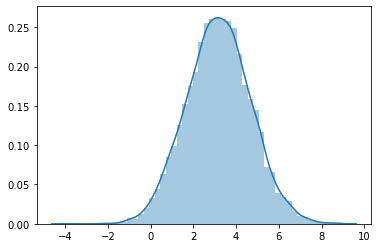

In [72]:
# Import norm, matplotlib.pyplot, and seaborn
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

# Create the sample using norm.rvs()
sample = norm.rvs(loc=3.15, scale=1.5, size=10000, random_state=13)

# Plot the sample
sns.distplot(sample)
plt.show()

2. What is the probability that a customer will spend $3 or less?

In [75]:
spending = norm.cdf(3, loc=3.15, scale=1.5)
spending

0.46017216272297107

3. What is the probability that a customer will spend more than $5?

In [76]:
spending = norm.sf(5, loc=3.15, scale=1.5)
spending

0.10872571321259111

4. What is the probability that a customer will spend more than \\$2.15 and \\$4.15 or less?

In [77]:
spending_A = norm.cdf(4.15, loc=3.15, scale=1.5)
spending_B = norm.cdf(2.15, loc=3.15, scale=1.5)
print(spending_A - spending_B)

0.4950149249061543


5. What is the probability that a customer will spend \\$2.15 or less or more than \\$4.15?

In [79]:
spending_A = norm.cdf(2.15, loc=3.15, scale=1.5)
spending_B = norm.sf(4.15, loc=3.15, scale=1.5)
print(spending_A + spending_B)

0.5049850750938457


#### Smartphone battery example
One of the most important things to consider when buying a smartphone is how long the battery will last.
Suppose the period of time between charges can be modeled with a normal distribution with a mean of 5 hours and a standard deviation of 1.5 hours.

A friend wants to buy a smartphone and is asking you the following questions.
1. What is the probability that the battery will last less than 3 hours?

In [80]:
# Probability that battery will last less than 3 hours
less_than_3h = norm.cdf(3, loc=5, scale=1.5)
print(less_than_3h)

0.09121121972586788


2. What is the probability that the battery will last more than 3 hours?

In [81]:
# Probability that battery will last more than 3 hours
more_than_3h = norm.sf(3, loc=5, scale=1.5)
print(more_than_3h)

0.9087887802741321


3. What is the probability that the battery will last between 5 and 7 hours?

In [82]:
less_than_5 = norm.cdf(5, loc=5, scale=1.5)
less_than_7 = norm.cdf(7, loc=5, scale=1.5)
between_5_and_7 = less_than_7 - less_than_5
print(between_5_and_7)

0.4087887802741321


#### Adults' heights example
The heights of adults aged between 18 and 35 years are normally distributed. For males, the mean height is 70 inches with a standard deviation of 4. Adult females have a mean height of 65 inches with a standard deviation of 3.5. You can see how the heights are distributed in this plot:
![](https://firebasestorage.googleapis.com/v0/b/firescript-577a2.appspot.com/o/imgs%2Fapp%2Fstoicliving%2FSCmcbIyxDW.png?alt=media&token=8a41229c-49cd-4fea-b3a4-f584844825ad)


**Q1: Print the range of female heights one standard deviation from the mean?**

In [83]:
#one standard deviation = 0.68 alpha

height_range = norm.interval(alpha=0.68, loc=65, scale=3.5)
height_range

(61.51939740876586, 68.48060259123413)

**Q2: Print the value where the tallest males fall with 0.01 probability?**

In [84]:
# we will use PPF: Percent point function (inverse of cdf — percentiles).
tallest = norm.ppf(q=0.99, loc=70, scale=4)
tallest

79.30539149616337

**Q3: Print the probability of being taller than 73 inches for a male and for a female.**

In [86]:
male_probability = norm.sf(73, loc=70, scale=4)
female_probability = norm.sf(73, loc=65, scale=3.5)
print(male_probability, female_probability)

0.2266273523768682 0.011135489479616392


**Q4: Print the probability of being shorter than 61 inches for a male and for a female.**

In [87]:
# Probability of being shorter than 61 inches for males and females
P_shorter_male = norm.cdf(61, loc=70, scale=4)
P_shorter_female = norm.cdf(61, loc=65, scale=3.5)
print(P_shorter_male, P_shorter_female)

0.012224472655044696 0.12654895447355774
